# Run the whole deltas algorithm

In [347]:
%load_ext autoreload
%autoreload 2

import deltas
from deltas.pipeline import data, classifier, evaluation
from deltas.model import downsample

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Get data

Pima Indian Diabetes: 768
Classes total: 500 - 268

Classes train: 350 - 187
Classes test:  150 - 81


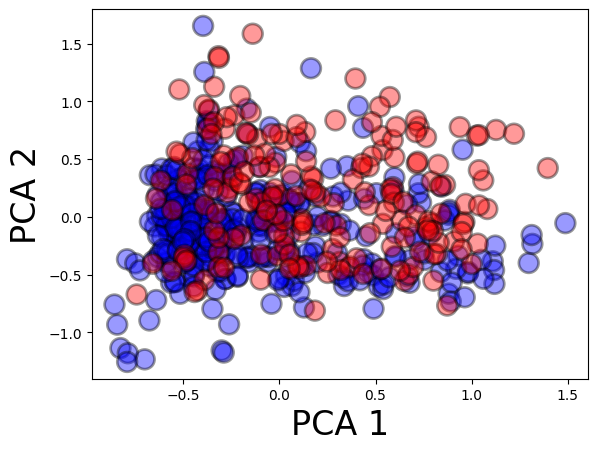

In [348]:
datasets = {0: 'Breast Cancer', 2: 'Iris', 3: 'Wine', 4: 'Pima Indian Diabetes', 
            5: 'Sonar Rocks vs Mines', 6: 'Banknote Authentication',
            7: 'Abalone Gender', 8: 'Ionosphere', 9: 'Wheat Seeds',
            10: 'Credit Scoring 1', 11: 'Credit Scoring 2', 
            12: 'Direct Marketing', 13: 'Habermans breast cancer'}
dataset = datasets[2]  # change ind to select dataset to use
model = 'MLP'

dataset = datasets[4]  # change ind to select dataset to use
model = 'SVM-rbf'
# model = 'MLP'
# model = 'MLP-deep'

# dataset = datasets[7]  # change ind to select dataset to use
data_clf = data.get_real_dataset(dataset, scale=True)
deltas.plotting.plots.plot_classes(data_clf['data'], dim_reducer=data_clf['dim_reducer'])

## Get Classifier

Tuning SVM params with 5 fold CV


Best SVM params: {'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}
Original


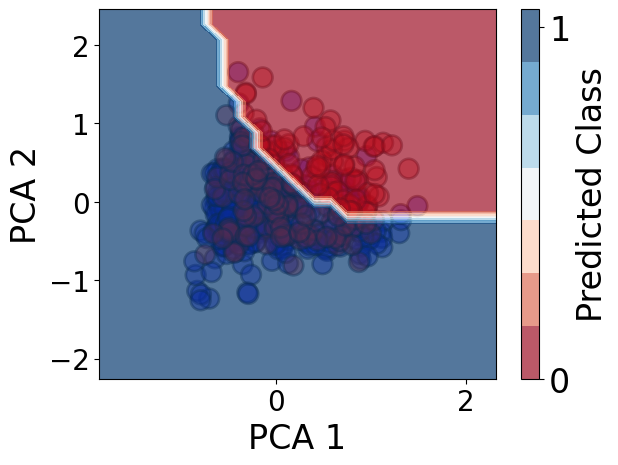

SMOTE


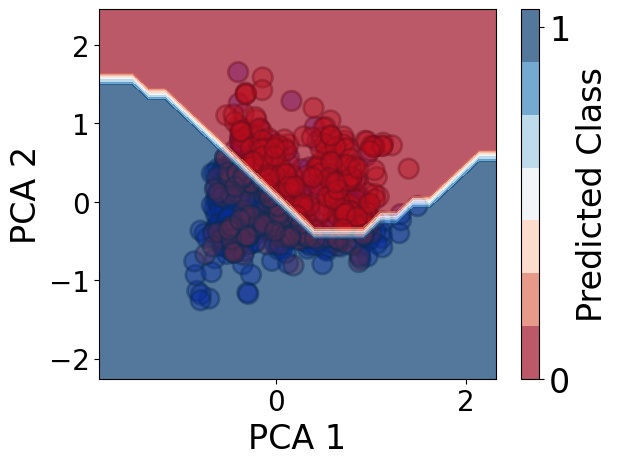

Balanced Weights


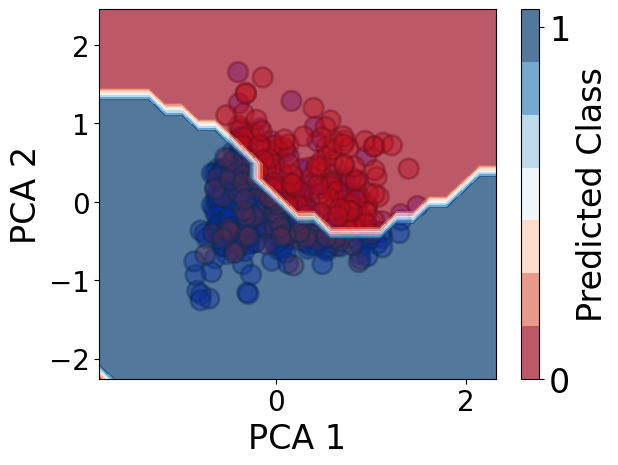

Bayes Minimum Risk (calibrated)


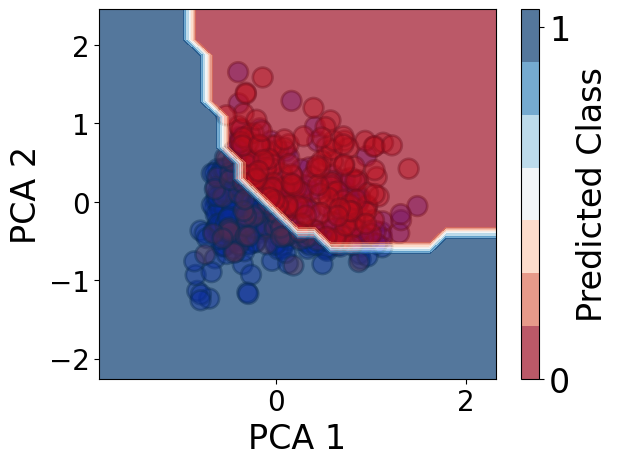

Bayes Minimum Risk


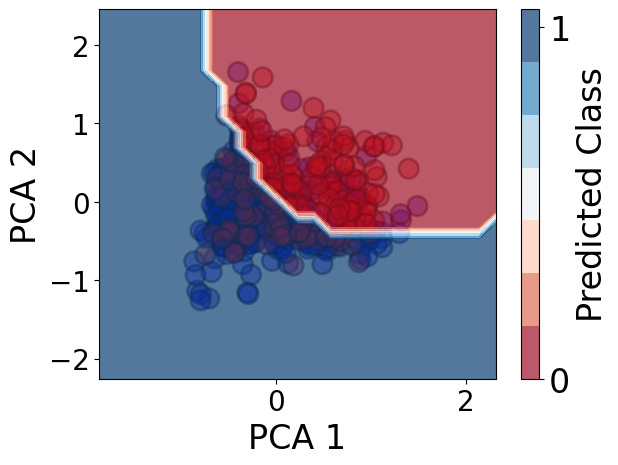

Thresholding


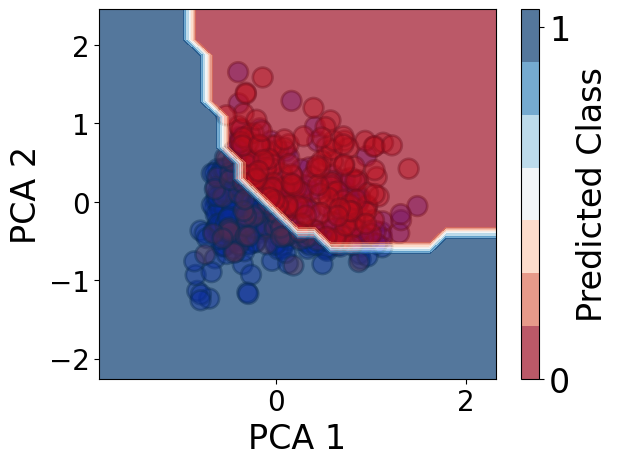

In [349]:
classifiers_dict = classifier.get_classifier(
                      data_clf=data_clf,
                      model=model)

data_clf['clf'] = classifiers_dict['Original']

## Fit deltas

Original Data


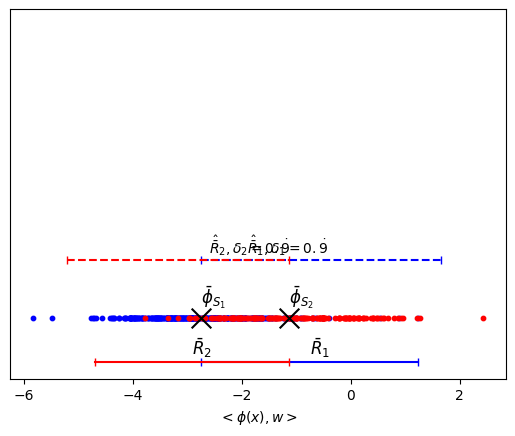

Unable to find result with downsample, increase the max_trials


In [350]:
X = data_clf['data']['X']
y = data_clf['data']['y']
clf = data_clf['clf']
# deltas_model = model_deltas.reprojection_deltas(
deltas_model = downsample.downsample_deltas(clf).fit(X, y, 
                                                     alpha=10,
                                                     _print=True, 
                                                     _plot=True, 
                                                     parallel=True)

## Plot training data information

In [351]:
# deltas_model.plot_data(data_clf['mean1'], data_clf['mean2'])
deltas_model.plot_data()

Not fit to any data yet, call 'fit(X, y)'  method first


## Show parameters

In [352]:
deltas_model.print_params()

Not fit to any data yet, call 'fit(X, y)' or  method first


# Evaluation on test data

Not fit to any data yet, call 'fit(X, y)' or  method first
                                 Accuracy    G-Mean   ROC-AUC        F1
Method                                                                 
Original                         0.766234  0.683130  0.709259  0.608696
SMOTE                            0.757576  0.750528  0.750864  0.678161
Balanced Weights                 0.727273  0.715208  0.716173  0.635838
Bayes Minimum Risk (calibrated)  0.722944  0.744362  0.749753  0.680000
Bayes Minimum Risk               0.761905  0.750528  0.751358  0.678363
Thresholding                     0.722944  0.744362  0.749753  0.680000
Our Method                       0.766234  0.683130  0.709259  0.608696 


Original


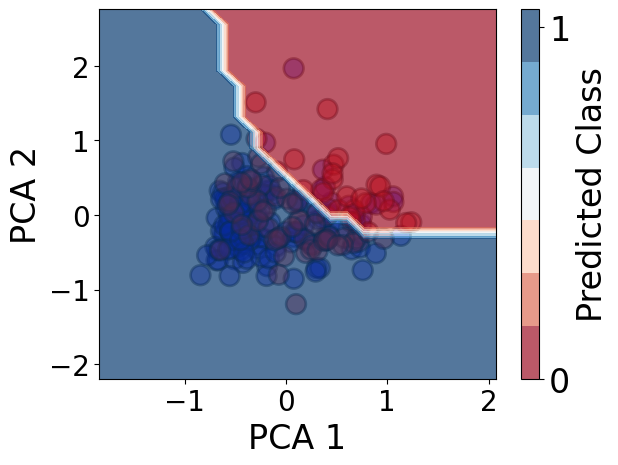

SMOTE


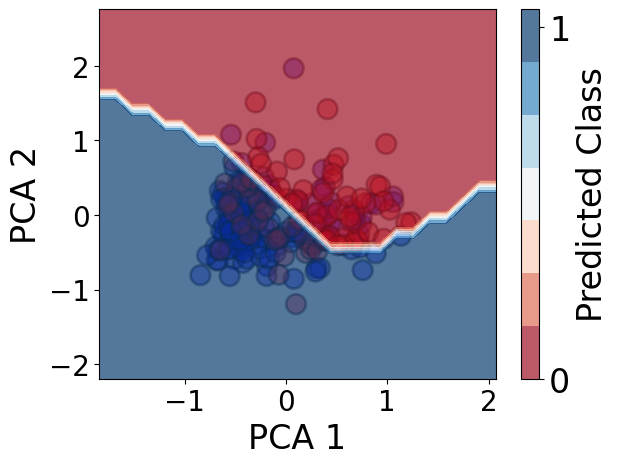

Balanced Weights


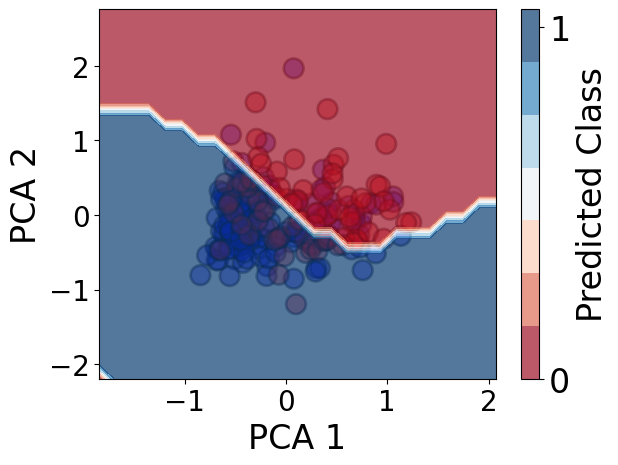

Bayes Minimum Risk (calibrated)


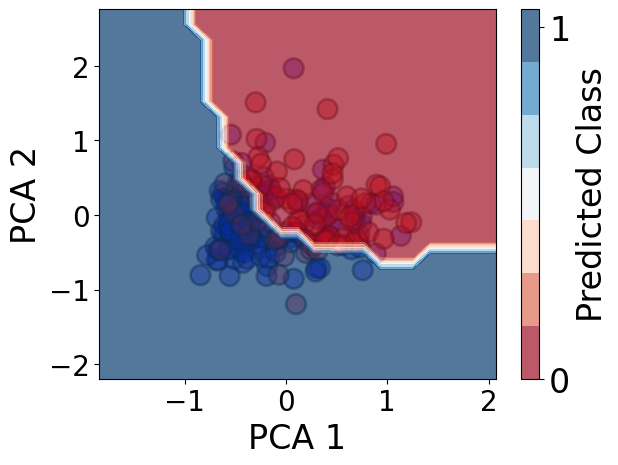

Bayes Minimum Risk


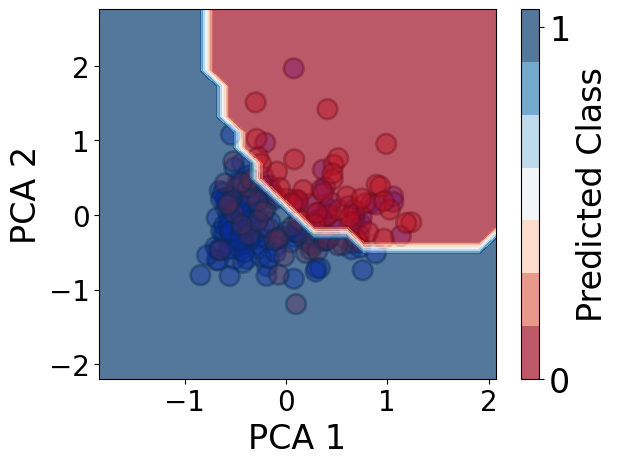

Thresholding


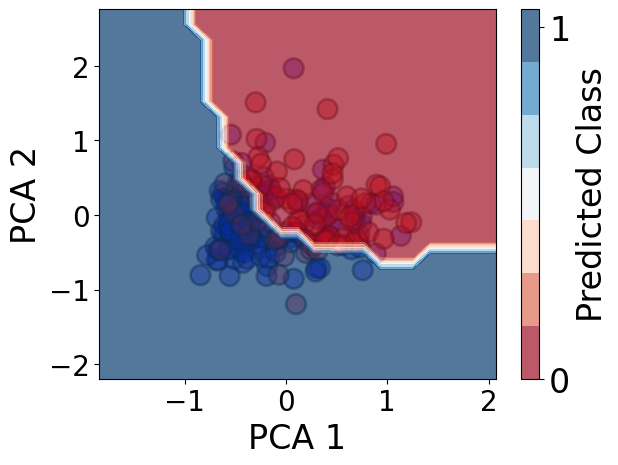

Our Method
Not fit to any data yet, call 'fit(X, y)' or  method first


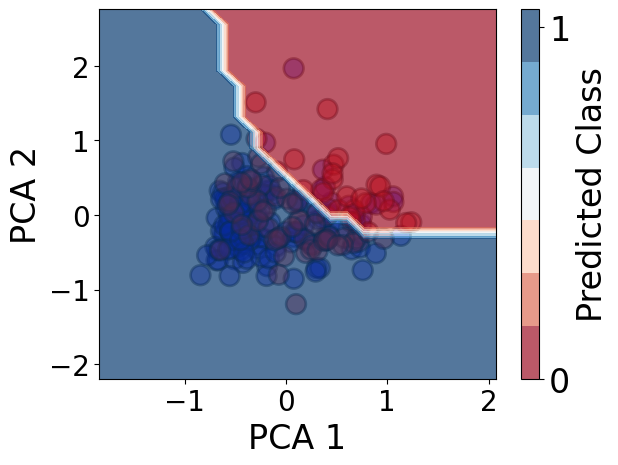

Giving bias from original classifier


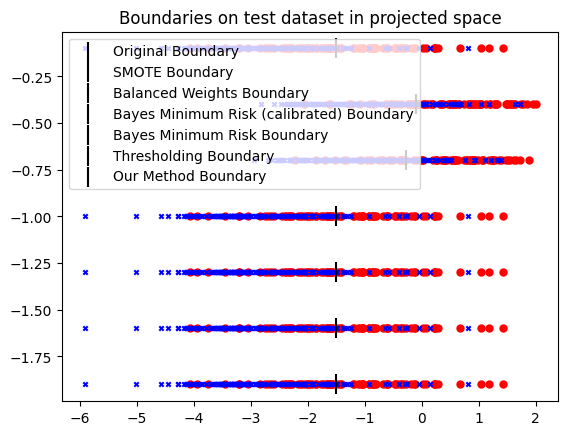

LATEX table format


\begin{tabular}{lrrrr}
 & Accuracy & G-Mean & ROC-AUC & F1 \\
Method &  &  &  &  \\
Original & 0.7662 & 0.6831 & 0.7093 & 0.6087 \\
SMOTE & 0.7576 & 0.7505 & 0.7509 & 0.6782 \\
Balanced Weights & 0.7273 & 0.7152 & 0.7162 & 0.6358 \\
Bayes Minimum Risk (calibrated) & 0.7229 & 0.7444 & 0.7498 & 0.6800 \\
Bayes Minimum Risk & 0.7619 & 0.7505 & 0.7514 & 0.6784 \\
Thresholding & 0.7229 & 0.7444 & 0.7498 & 0.6800 \\
Our Method & 0.7662 & 0.6831 & 0.7093 & 0.6087 \\
\end{tabular}



,Accuracy,G-Mean,ROC-AUC,F1
Method,,,,
Original,0.766234,0.683130,0.709259,0.608696
SMOTE,0.757576,0.750528,0.750864,0.678161
Balanced Weights,0.727273,0.715208,0.716173,0.635838
Bayes Minimum Risk (calibrated),0.722944,0.744362,0.749753,0.680000
Bayes Minimum Risk,0.761905,0.750528,0.751358,0.678363
Thresholding,0.722944,0.744362,0.749753,0.680000
Our Method,0.766234,0.683130,0.709259,0.608696


In [353]:
classifiers_dict['Our Method'] = deltas_model
evaluation.eval_test(classifiers_dict, data_clf['data_test'], _print=True,
              _plot=True, dim_reducer=data_clf['dim_reducer'])